In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data-v1/shooting.csv")

In [3]:
df.head()

,Unnamed: 0,Squad,G-xG,np:G-xG,npxG,npxG/Sh,xG,Dist,FK,G/Sh,...,PK,PKatt,Sh,Sh/90,SoT,SoT%,SoT/90,# Pl,90s,Season
0,1,Arsenal,4.0,2.5,16.5,0.10,21.0,16.5,0.0,0.11,...,6,6,168.0,14.00,55,32.7,4.58,23,12.0,2023-2024
1,2,Aston Villa,2.5,1.8,21.2,0.13,23.5,15.9,3.0,0.13,...,3,3,176.0,14.67,66,37.5,5.50,23,12.0,2023-2024
2,3,Bournemouth,-2.8,-2.8,13.8,0.10,13.8,17.1,6.0,0.08,...,0,0,138.0,11.50,50,36.2,4.17,25,12.0,2023-2024
3,4,Brentford,-4.1,-4.8,20.8,0.12,22.1,14.9,7.0,0.09,...,2,2,173.0,14.42,51,29.5,4.25,25,12.0,2023-2024
4,5,Brighton,2.2,2.0,20.0,0.12,20.8,17.1,5.0,0.13,...,1,1,171.0,14.25,70,40.9,5.83,25,12.0,2023-2024


In [4]:
df.columns

Index(['Unnamed: 0', 'Squad', 'G-xG', 'np:G-xG', 'npxG', 'npxG/Sh', 'xG',
       'Dist', 'FK', 'G/Sh', 'G/SoT', 'Gls', 'PK', 'PKatt', 'Sh', 'Sh/90',
       'SoT', 'SoT%', 'SoT/90', '# Pl', '90s', 'Season'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  280 non-null    int64  
 1   Squad       280 non-null    object 
 2   G-xG        140 non-null    float64
 3   np:G-xG     140 non-null    float64
 4   npxG        140 non-null    float64
 5   npxG/Sh     140 non-null    float64
 6   xG          140 non-null    float64
 7   Dist        140 non-null    float64
 8   FK          140 non-null    float64
 9   G/Sh        160 non-null    float64
 10  G/SoT       280 non-null    float64
 11  Gls         280 non-null    int64  
 12  PK          280 non-null    int64  
 13  PKatt       280 non-null    int64  
 14  Sh          160 non-null    float64
 15  Sh/90       160 non-null    float64
 16  SoT         280 non-null    int64  
 17  SoT%        160 non-null    float64
 18  SoT/90      280 non-null    float64
 19  # Pl        280 non-null    i

### Gereksiz sütunları çıkar

In [6]:
cols = ["Unnamed: 0","# Pl","90s","PKatt","PK"]
df.drop(columns=cols,axis=1,inplace=True)

In [7]:
df.head()

,Squad,G-xG,np:G-xG,npxG,npxG/Sh,xG,Dist,FK,G/Sh,G/SoT,Gls,Sh,Sh/90,SoT,SoT%,SoT/90,Season
0,Arsenal,4.0,2.5,16.5,0.10,21.0,16.5,0.0,0.11,0.35,25,168.0,14.00,55,32.7,4.58,2023-2024
1,Aston Villa,2.5,1.8,21.2,0.13,23.5,15.9,3.0,0.13,0.35,26,176.0,14.67,66,37.5,5.50,2023-2024
2,Bournemouth,-2.8,-2.8,13.8,0.10,13.8,17.1,6.0,0.08,0.22,11,138.0,11.50,50,36.2,4.17,2023-2024
3,Brentford,-4.1,-4.8,20.8,0.12,22.1,14.9,7.0,0.09,0.31,18,173.0,14.42,51,29.5,4.25,2023-2024
4,Brighton,2.2,2.0,20.0,0.12,20.8,17.1,5.0,0.13,0.31,23,171.0,14.25,70,40.9,5.83,2023-2024


In [8]:
df.corr()

,G-xG,np:G-xG,npxG,npxG/Sh,xG,Dist,FK,G/Sh,G/SoT,Gls,Sh,Sh/90,SoT,SoT%,SoT/90
G-xG,1.000000,0.991123,0.346727,0.273941,0.354675,-0.074443,0.301972,0.806039,0.749692,0.633922,0.269531,0.391133,0.413898,0.602707,0.544766
np:G-xG,0.991123,1.000000,0.339743,0.258639,0.348810,-0.054516,0.302441,0.801458,0.752471,0.626048,0.268678,0.377657,0.408514,0.587863,0.528319
npxG,0.346727,0.339743,1.000000,0.365537,0.993310,-0.089802,0.638039,0.442392,0.439650,0.939714,0.943660,0.574661,0.953065,0.319044,0.571558
npxG/Sh,0.273941,0.258639,0.365537,1.000000,0.349516,-0.640348,-0.027379,0.705461,0.679947,0.382399,0.075591,0.406412,0.183709,0.499048,0.507858
xG,0.354675,0.348810,0.993310,0.349516,1.000000,-0.070396,0.646883,0.441175,0.439552,0.947954,0.944071,0.573246,0.952828,0.316915,0.569539
Dist,-0.074443,-0.054516,-0.089802,-0.640348,-0.070396,1.000000,0.329997,-0.380667,-0.433857,-0.083581,0.131215,-0.187943,0.081168,-0.160044,-0.200480
FK,0.301972,0.302441,0.638039,-0.027379,0.646883,0.329997,1.000000,0.207276,0.155592,0.637918,0.716577,0.253907,0.727954,0.254588,0.296102
G/Sh,0.806039,0.801458,0.442392,0.705461,0.441175,-0.380667,0.207276,1.000000,0.919913,0.652099,0.255601,0.454517,0.405400,0.725980,0.630568
G/SoT,0.749692,0.752471,0.439650,0.679947,0.439552,-0.433857,0.155592,0.919913,1.000000,0.518857,0.242808,0.398238,0.051582,0.436986,0.147721
Gls,0.633922,0.626048,0.939714,0.382399,0.947954,-0.083581,0.637918,0.652099,0.518857,1.000000,0.871919,0.638131,0.854031,0.490735,0.710402


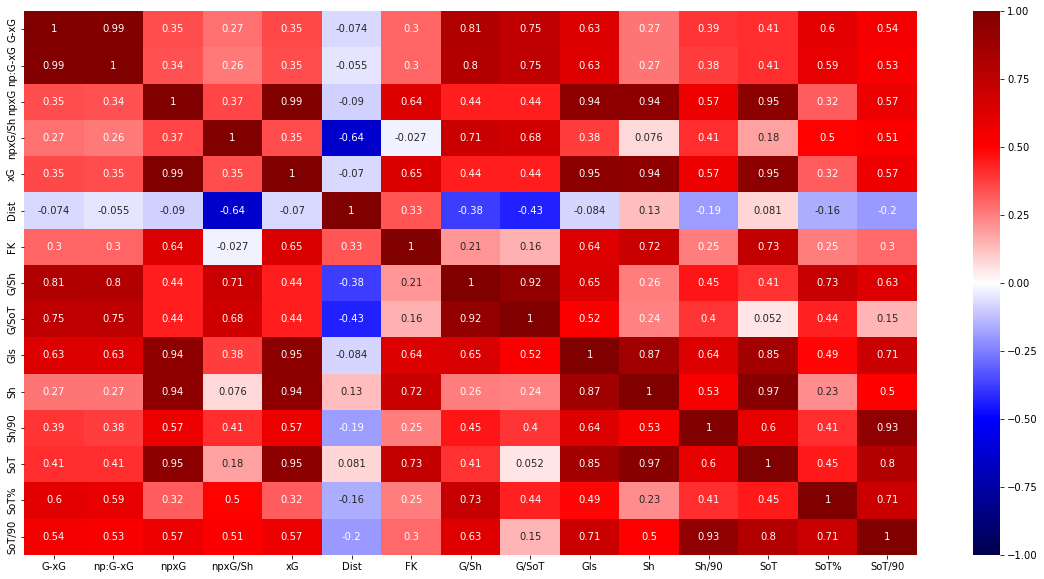

In [9]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [10]:
df.head()

,Squad,G-xG,np:G-xG,npxG,npxG/Sh,xG,Dist,FK,G/Sh,G/SoT,Gls,Sh,Sh/90,SoT,SoT%,SoT/90,Season
0,Arsenal,4.0,2.5,16.5,0.10,21.0,16.5,0.0,0.11,0.35,25,168.0,14.00,55,32.7,4.58,2023-2024
1,Aston Villa,2.5,1.8,21.2,0.13,23.5,15.9,3.0,0.13,0.35,26,176.0,14.67,66,37.5,5.50,2023-2024
2,Bournemouth,-2.8,-2.8,13.8,0.10,13.8,17.1,6.0,0.08,0.22,11,138.0,11.50,50,36.2,4.17,2023-2024
3,Brentford,-4.1,-4.8,20.8,0.12,22.1,14.9,7.0,0.09,0.31,18,173.0,14.42,51,29.5,4.25,2023-2024
4,Brighton,2.2,2.0,20.0,0.12,20.8,17.1,5.0,0.13,0.31,23,171.0,14.25,70,40.9,5.83,2023-2024


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
G-xG,140.0,-0.056429,7.001944,-14.50,-4.5250,-0.750,4.1000,24.40
np:G-xG,140.0,-0.136429,7.042862,-14.60,-4.7000,-0.800,4.0750,24.30
npxG,140.0,42.557857,15.761510,8.10,34.4000,42.100,51.5000,83.60
npxG/Sh,140.0,0.102429,0.013023,0.07,0.0900,0.100,0.1100,0.14
xG,140.0,46.077857,17.007485,9.70,36.7750,46.000,55.6250,92.00
Dist,140.0,17.412857,0.918228,14.90,16.7750,17.550,18.1000,19.20
FK,140.0,15.385714,7.084877,0.00,11.0000,15.500,20.0000,35.00
G/Sh,160.0,0.097812,0.023356,0.05,0.0800,0.100,0.1100,0.16
G/SoT,280.0,0.277786,0.051759,0.15,0.2400,0.280,0.3100,0.42
Gls,280.0,48.128571,18.153800,7.00,37.0000,45.000,58.5000,103.00


## Multicollinearity yüksek olanları çıkar
### - Tercihen toplam olan sonuçları çıkar, ortalama olanların kalması daha yararlı

In [12]:
# per 90 minutes datas'
multicol_cols = ["np:G-xG","Sh","SoT","npxG"]
df.drop(columns=multicol_cols,axis=1,inplace=True)

In [13]:
df.head()

,Squad,G-xG,npxG/Sh,xG,Dist,FK,G/Sh,G/SoT,Gls,Sh/90,SoT%,SoT/90,Season
0,Arsenal,4.0,0.10,21.0,16.5,0.0,0.11,0.35,25,14.00,32.7,4.58,2023-2024
1,Aston Villa,2.5,0.13,23.5,15.9,3.0,0.13,0.35,26,14.67,37.5,5.50,2023-2024
2,Bournemouth,-2.8,0.10,13.8,17.1,6.0,0.08,0.22,11,11.50,36.2,4.17,2023-2024
3,Brentford,-4.1,0.12,22.1,14.9,7.0,0.09,0.31,18,14.42,29.5,4.25,2023-2024
4,Brighton,2.2,0.12,20.8,17.1,5.0,0.13,0.31,23,14.25,40.9,5.83,2023-2024


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Squad    280 non-null    object 
 1   G-xG     140 non-null    float64
 2   npxG/Sh  140 non-null    float64
 3   xG       140 non-null    float64
 4   Dist     140 non-null    float64
 5   FK       140 non-null    float64
 6   G/Sh     160 non-null    float64
 7   G/SoT    280 non-null    float64
 8   Gls      280 non-null    int64  
 9   Sh/90    160 non-null    float64
 10  SoT%     160 non-null    float64
 11  SoT/90   280 non-null    float64
 12  Season   280 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 28.6+ KB


In [15]:
df.corr()

,G-xG,npxG/Sh,xG,Dist,FK,G/Sh,G/SoT,Gls,Sh/90,SoT%,SoT/90
G-xG,1.000000,0.273941,0.354675,-0.074443,0.301972,0.806039,0.749692,0.633922,0.391133,0.602707,0.544766
npxG/Sh,0.273941,1.000000,0.349516,-0.640348,-0.027379,0.705461,0.679947,0.382399,0.406412,0.499048,0.507858
xG,0.354675,0.349516,1.000000,-0.070396,0.646883,0.441175,0.439552,0.947954,0.573246,0.316915,0.569539
Dist,-0.074443,-0.640348,-0.070396,1.000000,0.329997,-0.380667,-0.433857,-0.083581,-0.187943,-0.160044,-0.200480
FK,0.301972,-0.027379,0.646883,0.329997,1.000000,0.207276,0.155592,0.637918,0.253907,0.254588,0.296102
G/Sh,0.806039,0.705461,0.441175,-0.380667,0.207276,1.000000,0.919913,0.652099,0.454517,0.725980,0.630568
G/SoT,0.749692,0.679947,0.439552,-0.433857,0.155592,0.919913,1.000000,0.518857,0.398238,0.436986,0.147721
Gls,0.633922,0.382399,0.947954,-0.083581,0.637918,0.652099,0.518857,1.000000,0.638131,0.490735,0.710402
Sh/90,0.391133,0.406412,0.573246,-0.187943,0.253907,0.454517,0.398238,0.638131,1.000000,0.409907,0.932983
SoT%,0.602707,0.499048,0.316915,-0.160044,0.254588,0.725980,0.436986,0.490735,0.409907,1.000000,0.705352


<AxesSubplot:>

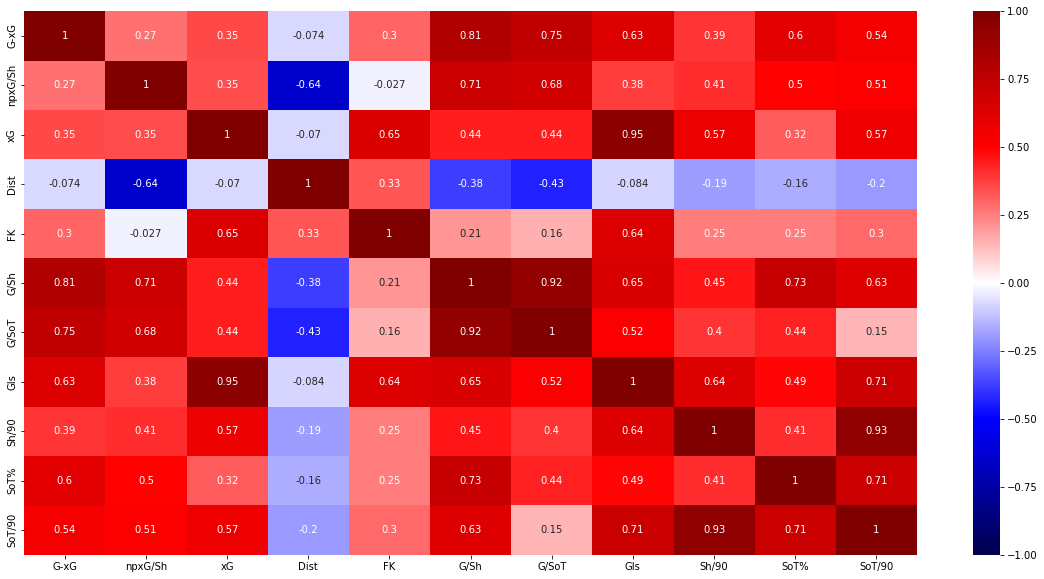

In [16]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [17]:
df.isnull().sum()

Squad        0
G-xG       140
npxG/Sh    140
xG         140
Dist       140
FK         140
G/Sh       120
G/SoT        0
Gls          0
Sh/90      120
SoT%       120
SoT/90       0
Season       0
dtype: int64

In [28]:
multicol_cols2 = ["G/Sh","npxG/Sh","xG","FK","Sh/90","G-xG"]
df.drop(columns=multicol_cols2,axis=1,inplace=True)

In [29]:
df = df.iloc[0:140]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Squad   140 non-null    object 
 1   Dist    140 non-null    float64
 2   G/SoT   140 non-null    float64
 3   Gls     140 non-null    int64  
 4   SoT%    140 non-null    float64
 5   SoT/90  140 non-null    float64
 6   Season  140 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 7.8+ KB


<AxesSubplot:>

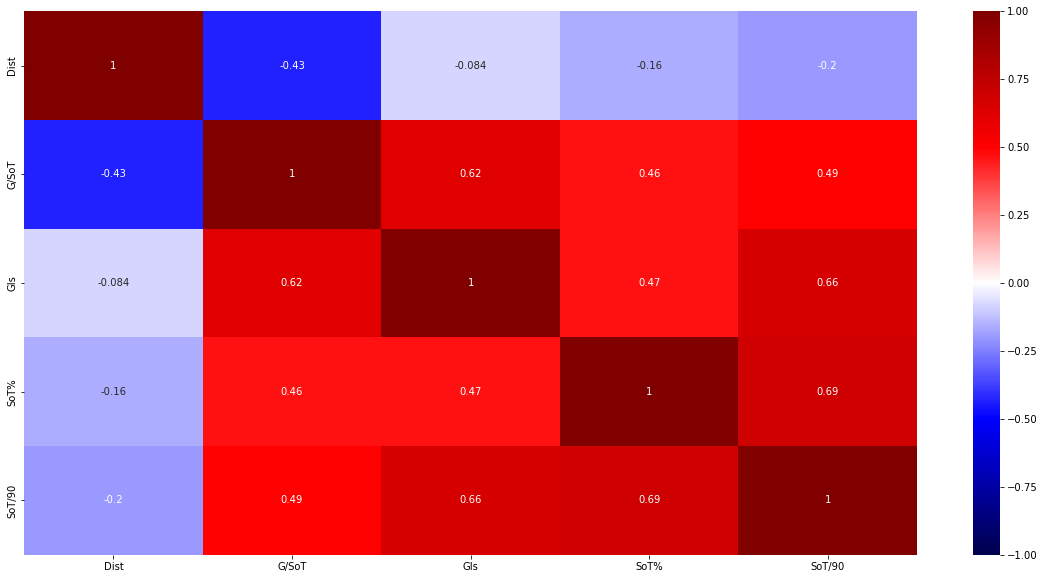

In [31]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [76]:
df.to_csv("../data-v2/shooting.csv", encoding='utf-8')